# Do Mask Mandates Affect Covid-19 Results?

Authors:
* Jon-Michael Hancock
* David Wool
* Mike Weinberg
* Storm King
* Matthew Thayer

### Original data and column descriptions: [Covid Tracking Project](https://covidtracking.com/data/download)


<center> <h2> States to be Explored</h2></center>

| State | Mask Mandate/Effective Date | # missing values in Date Range|
| --- | --- | --- |
| South Carolina | N/A | 0 |
| North Carolina | 06-24-2020 | 0 |
| Georgia | N/A | 0 |
| Virginia | 05-29-2020 | 0 |
| Arkansas | 07-20-2020 | 0 |
| New Jersey | 07-08-2020 | 0 |
| Connecticut | 04-20-2020 | 0 |



<center> <h3> Date Range to be Explored: 4/13/20-7/27/20 </h3></center>



## Importing Data

In [30]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [31]:
#Import data directly from google drive as data
orig_url = 'https://drive.google.com/file/d/1D3KX8DD2V__a3wnIf9UyQ1z_0rlS55WC/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)

## Data Understanding: Entire Dataset

In [32]:
pd.options.display.max_columns=None
data.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200727,AK,3206.0,204162.0,NaN,38.0,NaN,NaN,NaN,3.0,NaN,817.0,A,7/27/2020 00:00,2020-07-27T00:00:00Z,07/26 20:00,21.0,NaN,2020-07-27T00:00:00Z,207264.0,NaN,NaN,3206.0,21.0,NaN,2,104,0,207368,207368,104,207368,1,0,de28ff6d7d2874c791219904c2fa81f83142a78f,0,0,0,0,0,NaN
1,20200727,AL,81115.0,576844.0,NaN,1599.0,9694.0,NaN,1081.0,NaN,577.0,32510.0,B,7/27/2020 11:00,2020-07-27T11:00:00Z,07/27 07:00,1491.0,9694.0,2020-07-27T11:00:00Z,655973.0,NaN,NaN,79129.0,1446.0,45.0,1,1821,6452,657959,657959,8273,657959,18,537,906fddfa88864f88bdf0d2bcb19cf267a406f2e6,0,0,0,0,0,NaN
2,20200727,AR,39447.0,445444.0,NaN,489.0,2624.0,NaN,NaN,110.0,369.0,32365.0,A,7/27/2020 14:40,2020-07-27T14:40:00Z,07/27 10:40,408.0,2624.0,2020-07-27T14:40:00Z,484891.0,NaN,NaN,39447.0,NaN,NaN,5,824,6800,484891,484891,7624,484891,7,82,819db85fb84f50809d492ae373ea4914e01077f0,0,0,0,0,0,NaN
3,20200727,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,7/16/2020 00:00,2020-07-16T00:00:00Z,07/15 20:00,0.0,NaN,2020-07-16T00:00:00Z,NaN,NaN,NaN,0.0,NaN,NaN,60,0,0,1037,1037,0,1037,0,0,e2900aeb060df366a3f3a70300dccec3b2e33ae8,0,0,0,0,0,NaN
4,20200727,AZ,163827.0,714506.0,NaN,2626.0,7751.0,820.0,NaN,567.0,NaN,21321.0,A+,7/27/2020 00:00,2020-07-27T00:00:00Z,07/26 20:00,3304.0,7751.0,2020-07-27T00:00:00Z,878333.0,NaN,NaN,137710.0,2431.0,152.0,4,1813,9417,878333,878333,11230,878333,-1,45,11d6f676a2f3a2381d94968e48b3b0b447284a05,0,0,0,0,0,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 41 columns):
date                        8081 non-null int64
state                       8081 non-null object
positive                    8066 non-null float64
negative                    7925 non-null float64
pending                     1054 non-null float64
hospitalizedCurrently       5511 non-null float64
hospitalizedCumulative      4297 non-null float64
inIcuCurrently              2802 non-null float64
inIcuCumulative             1159 non-null float64
onVentilatorCurrently       2454 non-null float64
onVentilatorCumulative      410 non-null float64
recovered                   4934 non-null float64
dataQualityGrade            6980 non-null object
lastUpdateEt                7737 non-null object
dateModified                7737 non-null object
checkTimeEt                 7737 non-null object
death                       7383 non-null float64
hospitalized                4297 non-null float64
d

## Data Preprocessing I
* Convert columns to categorical and datetime
* Select the columns relevant to our study:
    1. Date
    2. State
    3. Positive
    4. Negative
    5. Total Test Results
    6. Total Test Results Increase
* Check/Handle any null values

In [34]:
#Change state to category type
data['state'] = data['state'].astype('category')
print(data.state.cat.categories)

Index(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='object')


In [35]:
#We will select only features pertaining to date, negative, positive, state, totalTestResults,
#totalTestResultsIncrease and store it into data_sub as the subset
data_sub = data[['date', 'state', 'positive', 'negative', 'totalTestResults', 'totalTestResultsIncrease']]

In [36]:
#Convert date to date-time object
data_sub.date = pd.to_datetime(data_sub.date, format='%Y%m%d', errors='coerce')

#Check to make sure all dates converted properly ie. errors='coerce' did not return a NAN
pd.isna(data_sub.date).sum()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0

## Data Understanding: Subset of Data

In [37]:
#Display date ranges for entire dataset
print(max(data_sub['date']))
print(min(data_sub['date']))

2020-07-27 00:00:00
2020-01-22 00:00:00


In [38]:
#Check for any null/nan values in dataset
print(data_sub.isna().sum())

#display rows where one or more nan values are present
data_sub_na = data_sub[data_sub.isna().any(axis=1)]

date                          0
state                         0
positive                     15
negative                    156
totalTestResults              0
totalTestResultsIncrease      0
dtype: int64


### Although there are missing data values in the dataset for the positive and negative columns, we will ignore for now and check again when we further split the data up among state/date ranges and handle if necessary.

In [39]:
#display the head of subset
data_sub.head()

,date,state,positive,negative,totalTestResults,totalTestResultsIncrease
0,2020-07-27,AK,3206.0,204162.0,207368,104
1,2020-07-27,AL,81115.0,576844.0,657959,8273
2,2020-07-27,AR,39447.0,445444.0,484891,7624
3,2020-07-27,AS,0.0,1037.0,1037,0
4,2020-07-27,AZ,163827.0,714506.0,878333,11230


In [40]:
#check using describe to see if any anomalies are present
data_sub.describe()

,positive,negative,totalTestResults,totalTestResultsIncrease
count,8066.000000,7.925000e+03,8.081000e+03,8081.000000
mean,27771.993429,2.667039e+05,2.892757e+05,6465.931197
std,58426.108202,5.715614e+05,6.185833e+05,12944.340929
min,0.000000,0.000000e+00,0.000000e+00,-74189.000000
25%,633.250000,1.205200e+04,1.118400e+04,296.000000
50%,6260.000000,7.752900e+04,8.166000e+04,2056.000000
75%,28532.250000,2.783180e+05,3.001000e+05,7023.000000
max,460550.000000,6.836028e+06,7.296578e+06,165227.000000


## Data Preprocessing II
* Create Helper functions to further subset the data by State & Date Range
* Test Helper functions
* Check each state by date range individually for missing values

### Helper Functions

In [41]:
#Function that returns only data for a specified state
def getStateSubset(stateName):
    return data_sub.loc[data_sub['state'] == stateName]

In [42]:
#Test to make sure getStateSubset() works properly
desired_state_data = getStateSubset('AK')
desired_state_data['state'].unique()

[AK]
Categories (1, object): [AK]

In [43]:
#Function that returns only data from a specific date range
def getStateSubsetByDateRange(start, end, stateName):
    state_df = getStateSubset(stateName)
    mask = (state_df['date'] >= start) & (state_df['date'] <= end)
    return state_df.loc[mask]

In [44]:
#Test to make sure dates fall into the specified range
desired_state_data = getStateSubsetByDateRange('2020-04-13', '2020-07-27', 'NC')
print(min(desired_state_data['date']))
print(max(desired_state_data['date']))

2020-04-13 00:00:00
2020-07-27 00:00:00


### Check all States to be explored for missing values

We decided to use only a small subset of states in our investigation because we felt that choosing a group of states that represented the major situations relevant to our question  would prove to be the more effective method than attempting to tackle the entire country.

We selected states that were somewhat geographically close and also states that represented a variety of schedules for mask mandate implementation (early, middle, late) as well as some that hadn't implemented any mandate for masks at all as of time data was gathered.

Connecticut was the earliest to mandate masks while North Carolina and Virginia were more towards the middle of the time frame we examined. Arkansas and New Jersey were much later in time to implement mandates for masks in public. South Carolina and Georgia had not implemented any mask mandate as of time data was gathered.

In [45]:
#Check all selected states within the date range for any null values
start_date = '2020-04-13'
end_date = '2020-07-27'
stateNames = ['AR', 'CT', 'NC', 'SC', 'VA', 'NJ', 'GA']
for stateName in stateNames:
#    desired_data = desired_data.iloc[0:0]
    desired_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    #Check desired_data for any null values
    print(stateName)
    print(desired_data.isna().sum())
    print('-------------------------')

AR
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
CT
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
NC
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
SC
date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
totalTestResultsIncrease    0
dtype: int64
-------------------------
VA
date                        0
state                       0
positive                    0
negative           

## Template for selecting specific state data by date range
**getStateSubsetByDateRange(start_date, end_date, state)**
* **start_date:** Beginning of date range in format 'YYYY-MM-DD'
* **end_date:** End of date range in format 'YYYY-MM-DD'
* **state:** Abbreviation of state to find data for


**Returns:** Pandas Dataframe representing Covid-19 Data for a specific State by Date Range

In [46]:
start_date = '2020-04-13'
end_date = '2020-07-27'
state = 'AR'

desired_state_data = getStateSubsetByDateRange(start_date, end_date, state)

<center> <h1>Visualizations</h1></center>

<font size="5">Please note that for each visualization organized below, the images present are screenshots that have been taken of the outputs of our code. The relevant code itself is present further down in the notebook and can be navigated to by clicking on the link after "For source code, see" at the bottom of each visualization's "Approach" section.
    </font>




<center> <h2> Positive Covid-19 Test Growth Rate Per State: </h2></center>

### Approach:
In order to examine the effectiveness of mask orders, we created visualizations using the daily change in positive cases, seven day rolling average of positive cases, mask mandate, and total percent positive cases for seven individual states. We wanted to see if there was a noticeable alteration of any of these statistics after the implementation of a mask mandate in a given state


1. Data Selection/Cleaning/Outlier Treatment/Imputation/etc:
    * We decided to narrow the date range to one week prior to the earliest mandate to the most current data at time of collection(start_date = '2020-04-13' & end_date = '2020-07-27') as well as select a subset of states representing: Mask Mandate early on, Mask Mandate toward middle of time frame, Mask Mandate Later on, No Mask Mandate.
    * We decided to select a subset of columns representing: 'date', 'state', 'positive', 'negative', 'totalTestResults', and 'totalTestResultsIncrease' as they were the most relevant to our research question
    * There were no null values in the dataset so no Imputation was necessary 
    * Outliers were kept in the data because there were not any that seemed to be human error as some states could have possibly held a scheduled 'Covid Testing Day' at large convenience stores, health departments, etc that caused positive cases for one day to spike. This meant that all that were outliers were still real data to be considered.
    * With this being the case we decided to implement a 7-day rolling average in order to handle some of the outliers that were present. This smoothed out our data significantly and made the visualizations much less chaotic.

For source code, see [Positive Covid-19 Test Growth Rate Per State](#section_1)


NOTE: Any graph with a dotted mask mandate line to the right of the data indicates that there is no mask mandate currently in effect.


| <center><font size=4 color='#9f9fff'>Scaled to Fit</font></center> | <center><font align="center" size=4 color='#9f9fff'>Not Scaled</font></center> |
| :---------------------: | :---------------------------: |
![alt](../img/VA_Scaled.png) | ![alt](../img/VA_Not_Scaled.png)
![alt](../img/NC_Scaled.png) | ![alt](../img/NC_Not_Scaled.png)
![alt](../img/SC_Scaled.png) | ![alt](../img/SC_Not_Scaled.png)
![alt](../img/AR_Scaled.png) | ![alt](../img/AR_Not_Scaled.png)
![alt](../img/GA_Scaled.png) | ![alt](../img/GA_Not_Scaled.png)
![alt](../img/CT_Scaled.png) | ![alt](../img/CT_Not_Scaled.png)
![alt](../img/NJ_Scaled.png) | ![alt](../img/NJ_Not_Scaled.png)




<center><font size=6 color='#9f9fff'>Percent Positive Cases Over Time</font></center>

| .| .|
| :---------------------: | :----: |
![alt](../img/VA_Percent_Positive.png) | ![alt](../img/NC_Percent_Positive.png) | 
![alt](../img/SC_Percent_Positive.png) | ![alt](../img/AR_Percent_Positive.png) |
![alt](../img/GA_Percent_Positive.png) | ![alt](../img/CT_Percent_Positive.png) |
![alt](../img/NJ_Percent_Positive.png) | |

### Conclusion: 
**In this section we examined:**
1. Change in Number of Positive Cases Over Time:
    * Included Scaled data to see the data points close up and unscaled data (range 0-4000) to compare magnitude of cases amongst other states
    * Important to note the yellow dotted line represents the statewide mask mandate date
    * There appeared to be some effect on the positive cases in Connecticut as a result of the mask mandate, but in other states like North Carolina the trend of increasing positive cases continued apparently unaffected. In Virginia there was already a downward trend by the time the mask mandate was implemented and it continued, but later there returned a gradual slope upwards. We theorize it could be due to the relaxing of regulation and of public behavior. In New Jersey, there does seem to be some effect but it's too early to be conclusive. 
    
    
2. Change in Percent Positive Cases Over Time:
    * This graph ONLY looks at the average percentage increase/decrease of cases over time
    * Once again in Connecticut there seemed to be a trend downwards in the percent positive test results after a mask mandate was issued. In North Carolina, New Jersey and Virginia however there was little impact directly following the mask order. It's important to note however that these graphs are not to scale and therefore some that trended down sharply started at a very high percent positive test results.


3. We added the following columns to the dataset to create these visualizations:
    * 'days_bef_after_mask_order'- an integer representation where 0 represents the mask order date and negative numbers are before, positive is after
    * 'pos_growth' - A calculated column representing (positive tests today - positive tests yesterday) for each day
    * 'pct_pos' - A calculated column representing (positive cases / (positive + negative cases)) for each day 

<center> <h2> Linear Regression on Positive Case Data Before and After Mask Mandate: </h2></center>

### Approach:
We want to use Linear Regression to find the line of best fit to fit the positive cases data BEFORE and AFTER the mask mandate. Prior to splitting the data to before and after segments, we want to examine the heatmaps for each state's dataframe to determine the correlation of the variables before creating the model. The fastest way to strengthen a model is to identify and reduce the features in the dataset that are highly correlated. Correlated features will add noise and inaccuracy to a model, which in turn will make it harder to achieve the desired outcome.

Once we determine the correlation of variables, we can create a linear regression model and examine the slope of positive growth in cases per day for each of the seven states we chose.

For source code, see [Heatmaps by State](#section_2)

<center><font size=6 color='#9f9fff'>Heat Map by State</font></center>

| .|. |
| :---------------------: | :---------------------------: |
![alt](../img/VA_Heat_Map.png) | ![alt](../img/NC_Heat_Map.png)
![alt](../img/SC_Heat_Map.png) | ![alt](../img/AR_Heat_Map.png)
![alt](../img/GA_Heat_Map.png) | ![alt](../img/CT_Heat_Map.png)
![alt](../img/NJ_Heat_Map.png) | 

<center><font ><h3>Heatmap Correlation between pos_growth and days_bef_after_mask_order by State</h3></font></center>

| <font size = 4>State</font> | <font size = 4>Correlation</font> | 
| --- | --- |
| South Carolina | 0.88 |
| North Carolina | 0.91 |
| Georgia | 0.8 |
| Virginia | 0.19 |
| Arkansas | 0.66 |
| New Jersey | -0.8 | 
| Connecticut | -0.63 | 

### Description: 
We specifically chose to examine the correlation of the columns pos_growth and days_bef_after_mask_order, plus 12 days. We chose the 12-day threshold to account for the incubation period and the time to be tested and receive results. Above is a table summarizing the correlation for each of the states. The correlation varies significantly for each state, which could imply that certain linear regression models (those with a correlation close to 0) may be slightly better models than those that are highly correlated.

For source code, see [Linear Regression for each state BEFORE/AFTER mask mandate:](#section_3)

| <center><font size=4 color='#9f9fff'>Before Mask Mandate + 12 Days</font></center> | <center><font align="center" size=4 color='#9f9fff'>After Mask Mandate + 12 Days</font></center> |
| :---------------------: | :---------------------------: |
![alt](../img/VA_Before.png) | ![alt](../img/VA_After.png)
![alt](../img/NC_Before.png) | ![alt](../img/NC_After.png)
![alt](../img/SC_Before.png) | 
![alt](../img/AR_Before.png) | 
![alt](../img/GA_Before.png) | 
![alt](../img/CT_Before.png) | ![alt](../img/CT_After.png)
![alt](../img/NJ_Before.png) | ![alt](../img/NJ_After.png)


<center> <h2> Slope of Positive/Negative Cases Before and After Mask Mandate</h2></center>

| State | Mask Mandate / Effective Date | Slope of Positive Cases Before Mandate | Slope of Positive Cases 12 Days After Mandate | % Difference |
| --- | --- | --- | --- | --- |
| South Carolina | N/A | 19.778 | N/A | N/A |
| North Carolina | 06-24-2020 | 17.854 | 6.171 | <font color='green'>-65.4363%</font> |
| Georgia | N/A | 31.336 | N/A | N/A |
| Virginia | 05-29-2020 | 9.764 | 15.332 | <font color='red'>57.025%</font> |
| Arkansas | 07-20-2020 | 7.991 | N/A | N/A |
| New Jersey | 07-08-2020 | -33.362 | 42.035 | <font color='red'>225.997%</font> |
| Connecticut | 04-20-2020 | 4.432 | -6.130 | <font color='green'>-238.312%</font> |


### Conclusion: 
The data was split into linear regression models before and after the mask mandate for each state. The before mandate linear regressor is on the left column and the after is on the right for each state. The slope for each line was calculated and summarized in the table above. On the far right is the % difference in the slope of the line for positive cases per day from before the mask order to after it for each state.(if applicable)
NOTE: Although Arkansas does have a mask mandate, it was so recent that it was impossible to determine an 'after mask mandate' due to the lack of data entries.

There are signs that the mask mandates are having an effect to stem the positive cases in North Carolina and in Connecticut but in New Jersey and Virginia it seems the opposite is true. Since Georgia and South Carolina did not have a mask mandate yet the change in slope could not be determined.


1. The best method: The visualizations that we first created seemed to give us the best direction in answering our research question. There was a lot of potential in creating the regression models, but the results ended up being rather polarized. We believe there are many other factors involved in the trend of positive cases going up or down and this led to our regression results being inconclusive. 


2. Some problems faced: 
    * Figuring out the best statistics to use when thinking about the effectiveness of mask mandates. Solved by deciding to change number of days into an integer value representing 0 for the day of the mandate and negative/positive for any dates before/after, and using both the number of positive cases for each day and a rolling 7 day average for the positive cases.  
    * Deciding which dates to use for the analysis of the mask mandate effectiveness. First we thought about selecting one week prior to the mandate and one week after, but this proved to be a problem with states that had a late mask mandate or none at all. Instead we decided to go with using one week before the earliest mandate and going all the way to the latest date entry in the dataframe so that all states could be compared on a similar timeline.
    * Deciding when to cut off the data to look at the slope of the linear regression line. Since mask mandates do not instantaneously stop the spread of the virus, we decided to add a 12 day buffer to the cutoff when running linear regression in order to account for the 2-14 day incubation period of the virus and the 3-5 days to receive test results. This allowed for us to be certain that cases contracted before the mandate were not factored into the linear regression model.


3. Furthering this research: We believe it would be beneficial to look at the specific ways that the mask mandates were implemented as well as the ways that some states have begun to phase them out. Though there are common facets to these plans there are concrete differences between them as well and this could explain some of the variance of effects on the spread of COVID in states. If we were able to isolate the mask mandates effect itself and remove the effect of other factors that come into play then our regression models would be far more useful. On top of all this, as time passes and more data is gathered the models will be better. 


4. Instructions for future researchers: Consider changing the window of dates from what we used to an updated one that includes more current data. Adjust rolling average numbers (3-day, 14-day, etc.) as suited for further research and possibly adjust the "effective date" (time after mask mandate that is considered time for it to begin having effect) to suit better knowledge gathered, we set it as 12 days but there may be new data that comes to light that says it should be different. 



## Source Code:

<a id='section_1'></a>
### Positive Covid-19 Test Growth Rate Per State:
#### Note: Scaled to fit

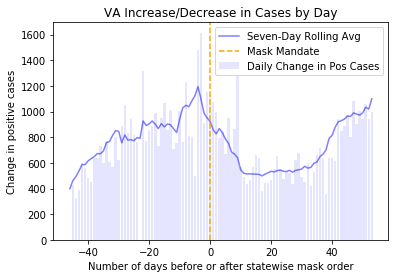

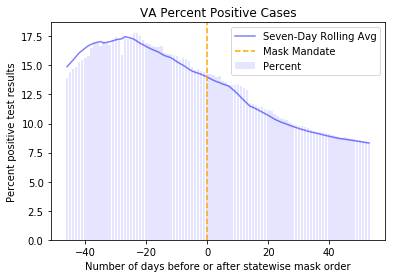

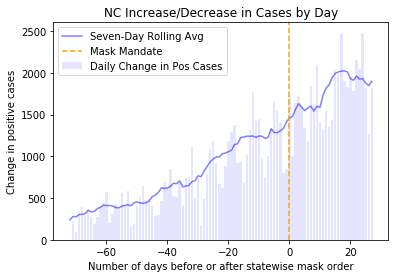

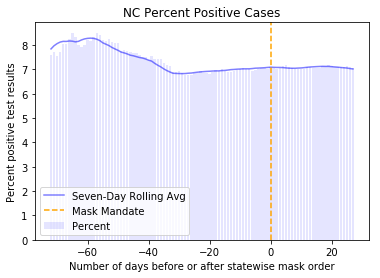

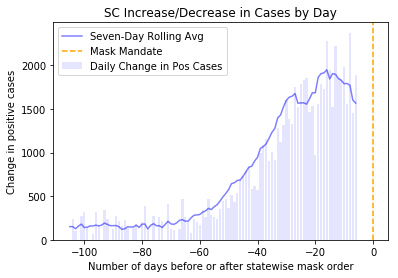

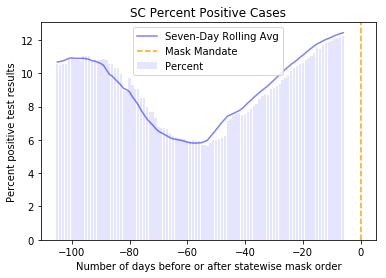

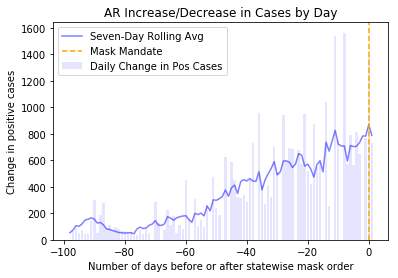

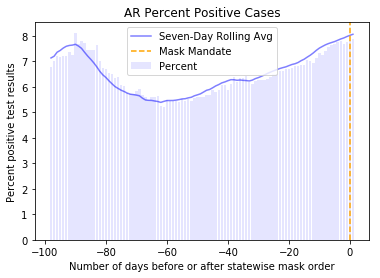

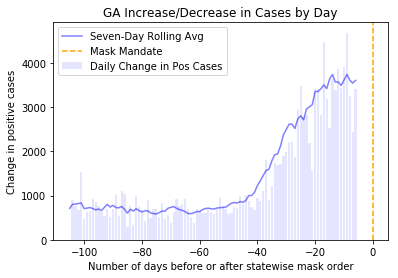

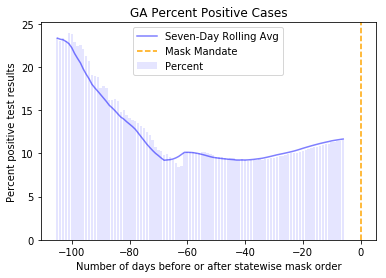

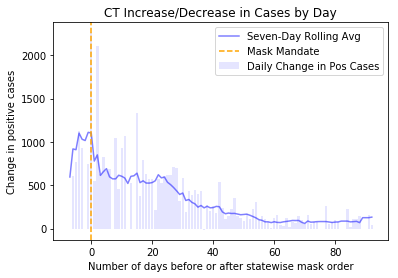

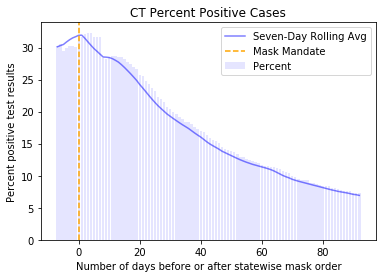

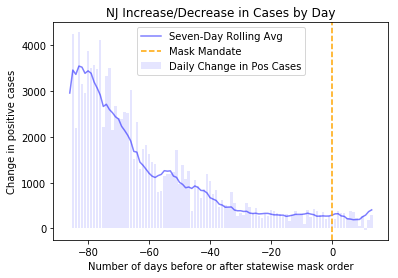

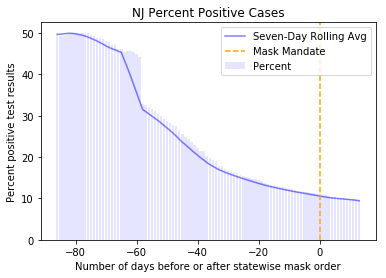

In [47]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
for stateName in stateNames:
    desired_state_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    
# re-index so that "index" and "index + 1"  will be correctly computed
    desired_state_data.reset_index(drop = True, inplace=True)
    
# Store date mask order went into effect.  Ideally this would be read into another dataframe and merged
# but in the interest of time we are using the following.
    if stateName == 'AR':
        mask_order_date = pd.to_datetime('2020-07-20')
    elif stateName == 'CT':
        mask_order_date = pd.to_datetime('2020-04-20')
    elif stateName == 'NC':
        mask_order_date = pd.to_datetime('2020-06-24')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    elif stateName == 'NJ':
        mask_order_date = pd.to_datetime('2020-07-08')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    else:
        mask_order_date = pd.to_datetime(end_date)
        
#Add columns for days before or after mask order, increase/decrease in positive cases, daily percent positive
    desired_state_data['days_bef_after_mask_order'] = desired_state_data['date'] - mask_order_date
    desired_state_data['pos_growth'] = 0
    desired_state_data['pct_pos'] = \
        desired_state_data['positive'] / (desired_state_data['positive'] + desired_state_data['negative'])
    
     
# Fill the daily increase/decrease by computing it
    row_count = desired_state_data.shape[0]
    for index in range(0, row_count-1):
        n_today     = desired_state_data.iloc[index]['positive']
        n_yesterday = desired_state_data.iloc[index+1]['positive']
        growth = n_today - n_yesterday
        desired_state_data.at[index, 'pos_growth'] = growth
        
# Add columns for the rolling seven-day averages and load into a new data frame
    desired_state_data['rolling_avg'] = desired_state_data.loc[:, ['pos_growth']].rolling(window=7).mean()
    desired_state_data['rolling_pct_pos'] = desired_state_data.loc[:, ['pct_pos']].rolling(window=7).mean()
 # Restrict rows since there is no rolling average until day 7
    columns = desired_state_data.columns
    dsd7 = desired_state_data.iloc[6:, [columns.get_loc('days_bef_after_mask_order'), \
                   columns.get_loc('pos_growth'), \
                   columns.get_loc('rolling_avg'), \
                   columns.get_loc('pct_pos'), \
                   columns.get_loc('rolling_pct_pos')]]
        
#retain for testing purposes   print(desired_state_data[['date', 'positive', 'pos_growth']])

    #ax = ts.plot(kind="bar")
    # Plot the daily increase/decrease in cases by day, with the date the mask order was applied as "Day 0"
    # Add another line for seven-day rolling average
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pos_growth'], color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_avg'], color = 'blue', alpha = 0.5)
    title = stateName + ' Increase/Decrease in Cases by Day'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Daily Change in Pos Cases'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Change in positive cases')
    plt.show()
    
    # Add graph for percent positive cases
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pct_pos'] * 100.0 , color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_pct_pos'] * 100.0, color = 'blue', alpha = 0.5)
    title = stateName + ' Percent Positive Cases'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Percent'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Percent positive test results')
    plt.show()
        

### Positive Covid-19 Test Growth Rate Per State:
#### Note: Not Scaled (Range from 0-4000 for all states)

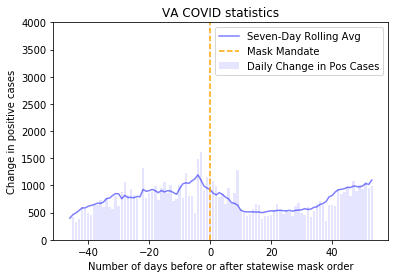

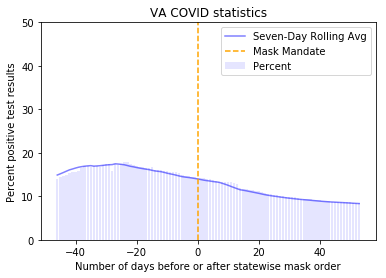

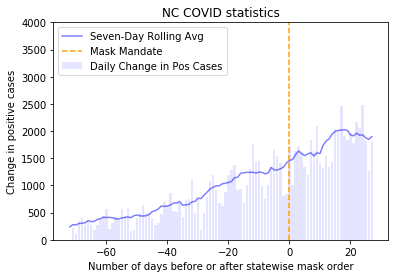

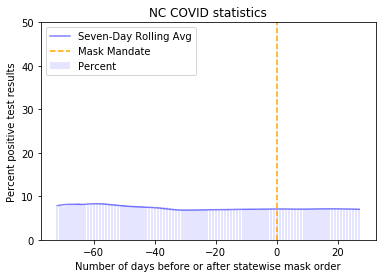

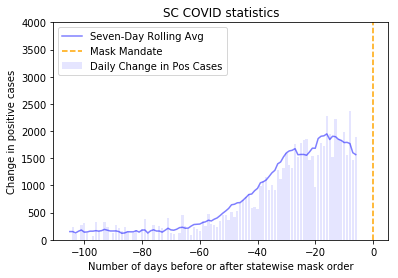

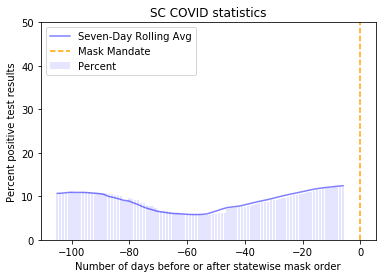

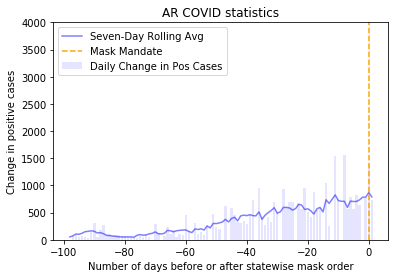

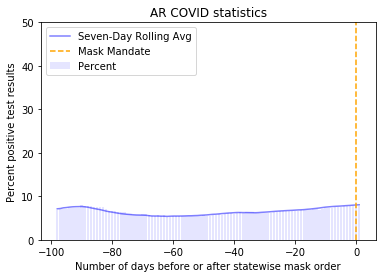

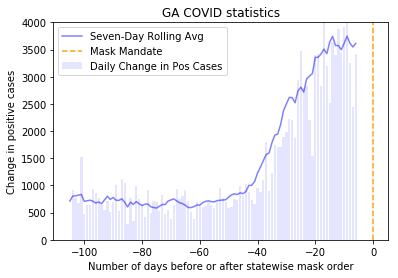

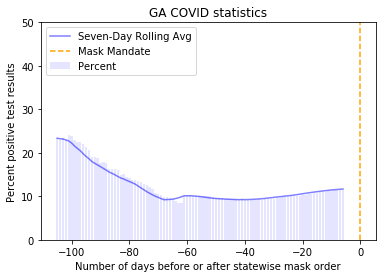

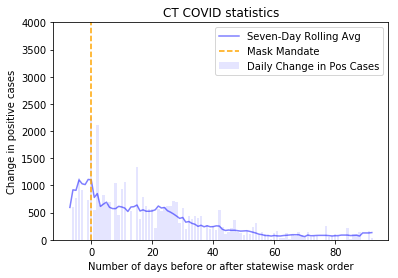

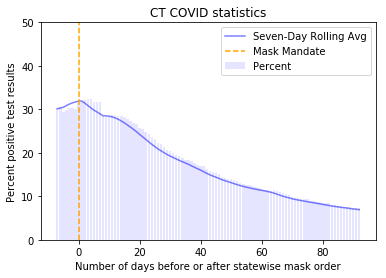

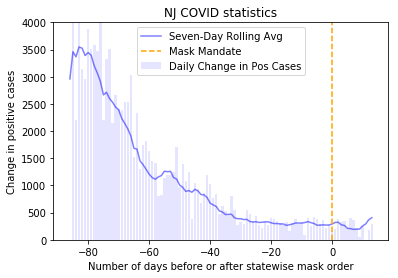

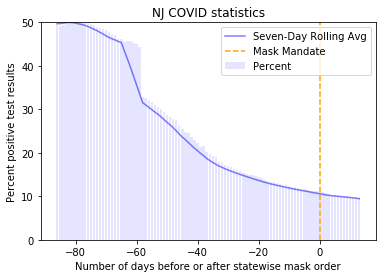

In [48]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
df_collection = []
for stateName in stateNames:
    desired_state_data = getStateSubsetByDateRange(start_date, end_date, stateName)
    
# re-index so that "index" and "index + 1"  will be correctly computed
    desired_state_data.reset_index(drop = True, inplace=True)
    
# Store date mask order went into effect.  Ideally this would be read into another dataframe and merged
# but in the interest of time we are using the following.
    if stateName == 'AR':
        mask_order_date = pd.to_datetime('2020-07-20')
    elif stateName == 'CT':
        mask_order_date = pd.to_datetime('2020-04-20')
    elif stateName == 'NC':
        mask_order_date = pd.to_datetime('2020-06-24')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    elif stateName == 'NJ':
        mask_order_date = pd.to_datetime('2020-07-08')
    elif stateName == 'VA':
        mask_order_date = pd.to_datetime('2020-05-29')
    else:
        mask_order_date = pd.to_datetime(end_date)
        
#Add columns for days before or after mask order, increase/decrease in positive cases, daily percent positive
    desired_state_data['days_bef_after_mask_order'] = desired_state_data['date'] - mask_order_date
    desired_state_data['pos_growth'] = 0
    desired_state_data['pct_pos'] = \
        desired_state_data['positive'] / (desired_state_data['positive'] + desired_state_data['negative'])
        
# Fill the daily increase/decrease by computing it
    row_count = desired_state_data.shape[0]
    for index in range(0, row_count-1):
        n_today     = desired_state_data.iloc[index]['positive']
        n_yesterday = desired_state_data.iloc[index+1]['positive']
        growth = n_today - n_yesterday
        desired_state_data.at[index, 'pos_growth'] = growth
        
# Add columns for the rolling seven-day averages and load into a new data frame
    desired_state_data['rolling_avg'] = desired_state_data.loc[:, ['pos_growth']].rolling(window=7).mean()
    desired_state_data['rolling_pct_pos'] = desired_state_data.loc[:, ['pct_pos']].rolling(window=7).mean()
 # Restrict rows since there is no rolling average until day 7
    columns = desired_state_data.columns
    dsd7 = desired_state_data.iloc[6:, [columns.get_loc('days_bef_after_mask_order'), \
                   columns.get_loc('pos_growth'), \
                   columns.get_loc('rolling_avg'), \
                   columns.get_loc('pct_pos'), \
                   columns.get_loc('rolling_pct_pos')]]
    df_collection.append(desired_state_data)
        
#retain for testing purposes   print(desired_state_data[['date', 'positive', 'pos_growth']])
    #ax = ts.plot(kind="bar")
    # Plot the daily increase/decrease in cases by day, with the date the mask order was applied as "Day 0"
    # Add another line for seven-day rolling average
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pos_growth'], color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_avg'], color = 'blue', alpha = 0.5)
    title = stateName + ' COVID statistics'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Daily Change in Pos Cases'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Change in positive cases')
    plt.ylim(top=4000)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.show()
    
        # Add graph for percent positive cases
    plt.bar(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['pct_pos'] * 100.0 , color='blue', alpha=0.1)
    plt.plot(dsd7['days_bef_after_mask_order'].dt.days.astype('int16'), dsd7['rolling_pct_pos'] * 100.0, color = 'blue', alpha = 0.5)
    title = stateName + ' COVID statistics'
    plt.title(title)
    plt.axvline(x=0,color='orange', ls='--')
    plt.legend(['Seven-Day Rolling Avg', 'Mask Mandate', 'Percent'],loc=0)
    plt.xlabel('Number of days before or after statewise mask order')
    plt.ylabel('Percent positive test results')
    plt.ylim(top=50)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  # adjust the bottom leaving top unchanged
    plt.show()

<a id='section_2'></a>
### Heatmaps by State:

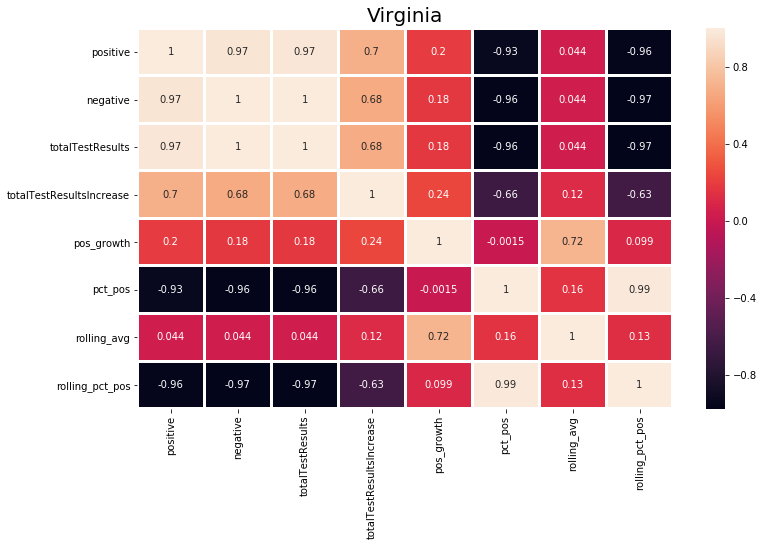

In [49]:
plt.figure(figsize=(12,7))

plt.title('Virginia', size = 20)
sns.heatmap(df_collection[0].corr(), annot=True, linewidths=2)

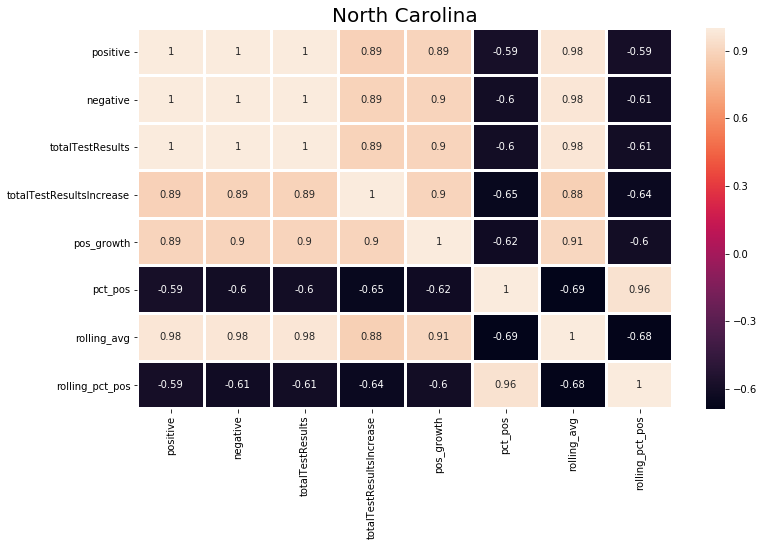

In [50]:
plt.figure(figsize=(12,7))
plt.title('North Carolina', size = 20)
sns.heatmap(df_collection[1].corr(), annot=True, linewidths=2)

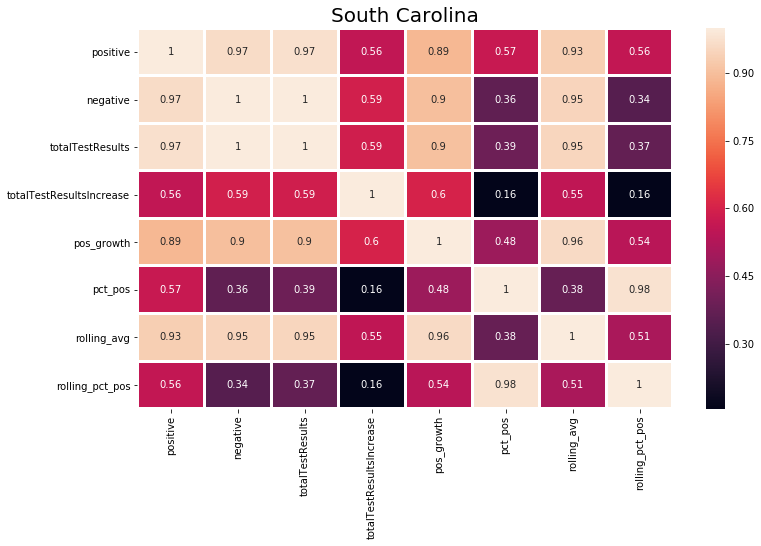

In [51]:
plt.figure(figsize=(12,7))
plt.title('South Carolina', size = 20)
sns.heatmap(df_collection[2].corr(), annot=True, linewidths=2)

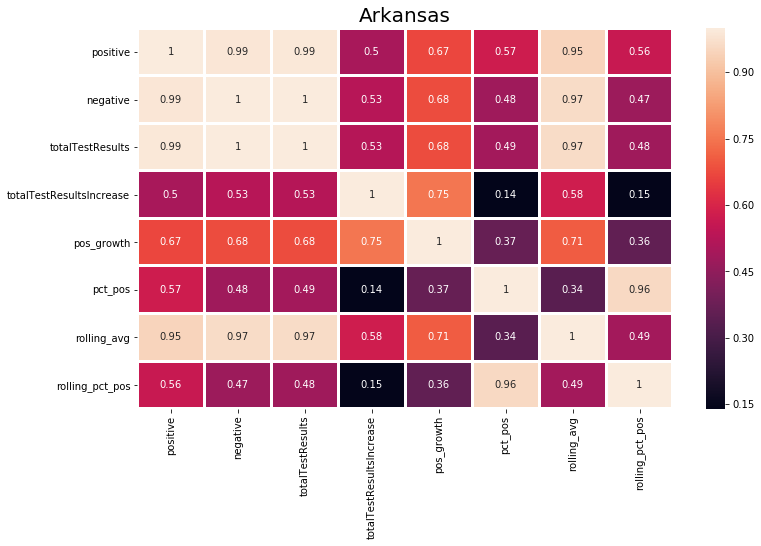

In [52]:
plt.figure(figsize=(12,7))
plt.title('Arkansas', size = 20)
sns.heatmap(df_collection[3].corr(), annot=True, linewidths=2)

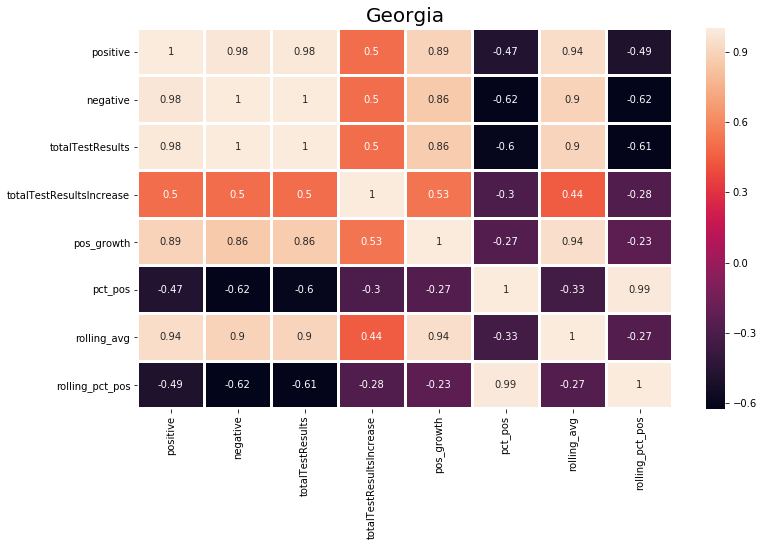

In [53]:
plt.figure(figsize=(12,7))
plt.title('Georgia', size = 20)
sns.heatmap(df_collection[4].corr(), annot=True, linewidths=2)

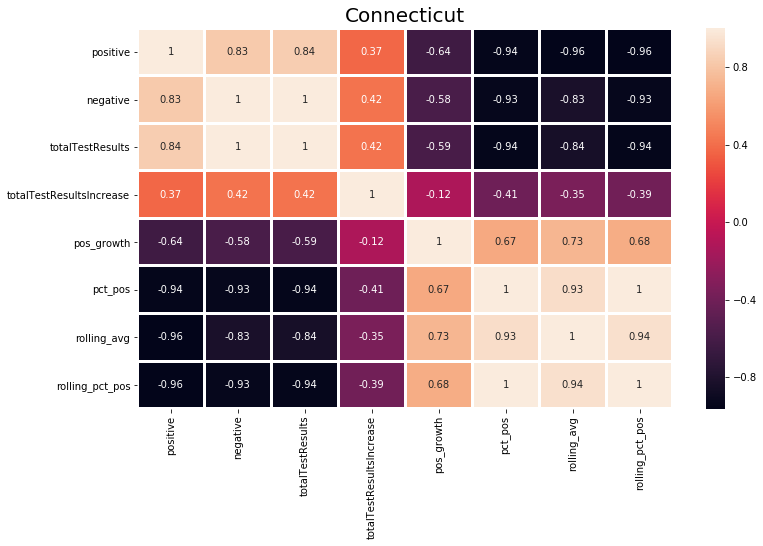

In [54]:
plt.figure(figsize=(12,7))
plt.title('Connecticut', size = 20)
sns.heatmap(df_collection[5].corr(), annot=True, linewidths=2)

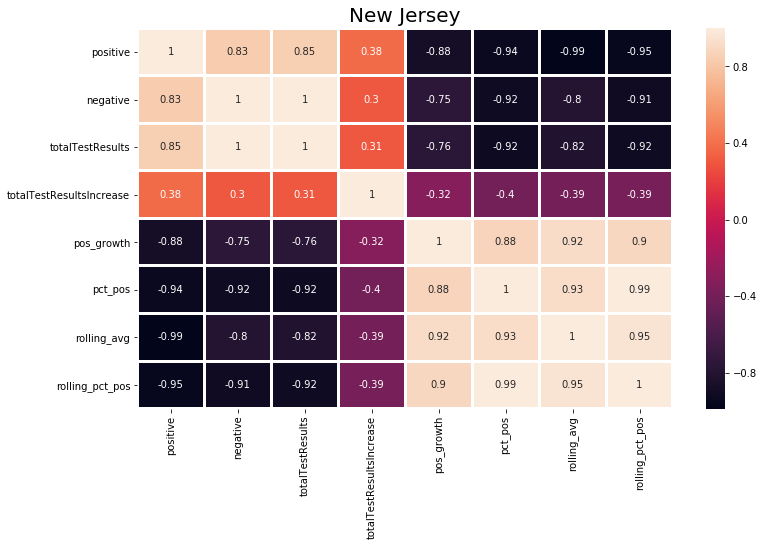

In [55]:
plt.figure(figsize=(12,7))
plt.title('New Jersey', size = 20)
sns.heatmap(df_collection[6].corr(), annot=True, linewidths=2)

<a id='section_3'></a>
### Linear Regression for each state BEFORE mask mandate:

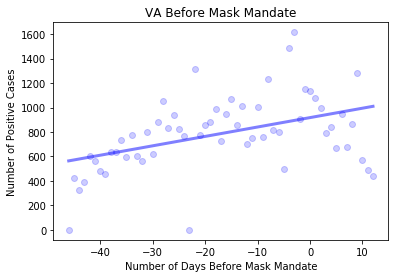

Slope of positive cases:
[[7.68585622]]


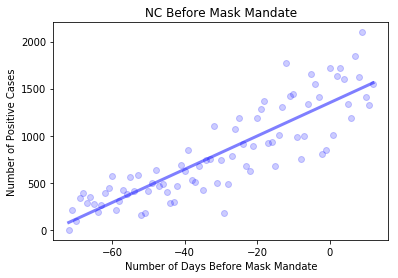

Slope of positive cases:
[[17.65133868]]


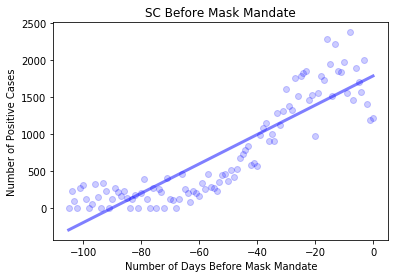

Slope of positive cases:
[[19.77878429]]


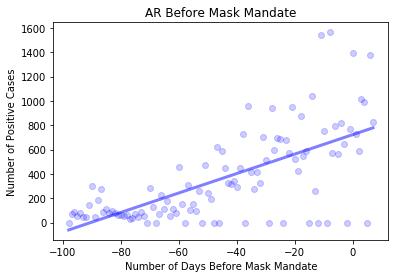

Slope of positive cases:
[[7.99100688]]


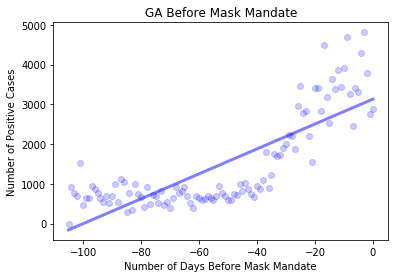

Slope of positive cases:
[[31.336766]]


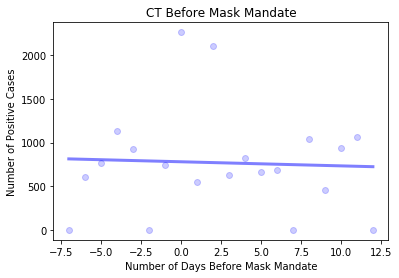

Slope of positive cases:
[[-4.70300752]]


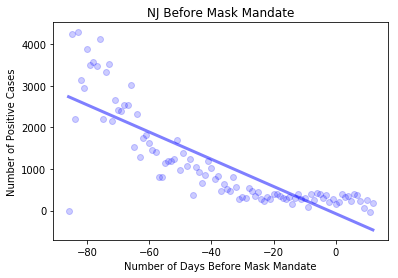

Slope of positive cases:
[[-32.67844156]]


<Figure size 432x288 with 0 Axes>

In [56]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
for index, state in enumerate(stateNames):
    df = df_collection[index]
    
    #Convert column to numeric
    df['int_days_mask_order'] = df['days_bef_after_mask_order'].apply(lambda x: x / np.timedelta64(1,'D'))
    
    #Store all rows BEFORE the mask mandate in df_before_mandate
    mask_before = df['int_days_mask_order'] <= 12
    df_before_mandate = df.loc[mask_before]
    
    #Store all values in the columns into X and y
    X_before = df_before_mandate['int_days_mask_order'].values
    y_before = df_before_mandate['pos_growth'].values
    
    #Reshape so that linear regression can fit the data
    X_before = X_before.reshape(X_before.size, 1)
    y_before = y_before.reshape(y_before.size, 1)
    
    #Fit the regressor
    regr_before = linear_model.LinearRegression()
    regr_before.fit(X_before, y_before)

    #Plot the data
    plt.scatter(X_before, y_before, color='blue', alpha=0.2)
    plt.plot(X_before, regr_before.predict(X_before), color = 'blue', linewidth=3, alpha=0.5)
    plt.xticks()
    plt.yticks()
    plt.title(state + ' Before Mask Mandate')
    plt.xlabel('Number of Days Before Mask Mandate')
    plt.ylabel('Number of Positive Cases')
    plt.show()
    
    #Print the slope of the line
    print("Slope of positive cases:")
    print(regr_before.coef_)
    
    plt.clf()

### Linear Regression for each state AFTER mask mandate:

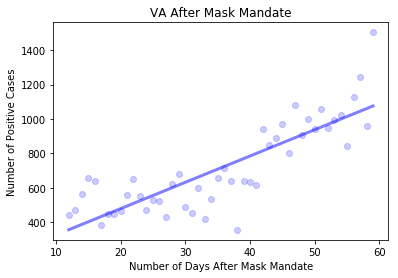

Slope of positive cases:
[[15.33282675]]


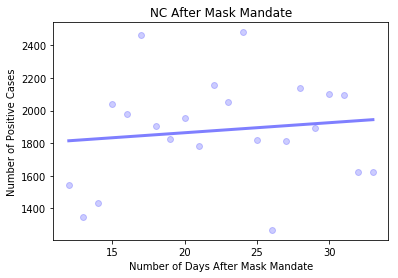

Slope of positive cases:
[[6.17108978]]


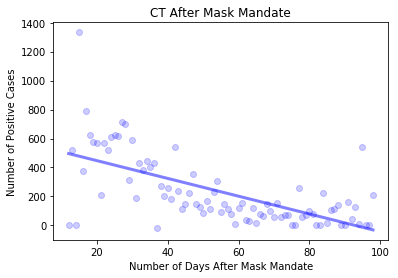

Slope of positive cases:
[[-6.13018517]]


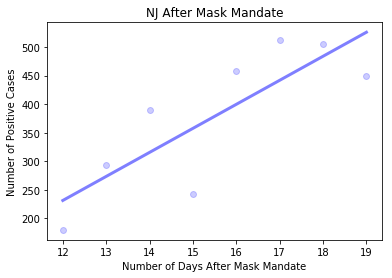

Slope of positive cases:
[[42.03571429]]


<Figure size 432x288 with 0 Axes>

In [57]:
stateNames = ['VA', 'NC', 'SC', 'AR', 'GA', 'CT', 'NJ']
for index, state in enumerate(stateNames):
    #Do not include SC or Georgia because they do NOT have mask mandates
    if((state != 'SC')):
        if((state != 'GA') and (state != 'AR')):
            df = df_collection[index]

            #Store all rows AFTER the mask mandate in df_after_mandate
            mask_after = df['int_days_mask_order'] >= 12
            df_after_mandate = df.loc[mask_after]
            
            #Store all values in the columns into X and y
            X_after = df_after_mandate['int_days_mask_order'].values
            y_after = df_after_mandate['pos_growth'].values

            #Reshape so that linear regression can fit the data
            X_after = X_after.reshape(X_after.size, 1)
            y_after = y_after.reshape(y_after.size, 1)

            #Fit the regressor
            regr_after = linear_model.LinearRegression()
            regr_after.fit(X_after, y_after)

            #Plot the data
            plt.scatter(X_after, y_after, color='blue', alpha=0.2)
            plt.plot(X_after, regr_after.predict(X_after), color = 'blue', linewidth=3, alpha=0.5)
            plt.xticks()
            plt.yticks()
            plt.title(state + ' After Mask Mandate')
            plt.xlabel('Number of Days After Mask Mandate')
            plt.ylabel('Number of Positive Cases')
            plt.show()

            #Print the slope of the line
            print("Slope of positive cases:")
            print(regr_after.coef_)

            plt.clf()